<div style="
    background-color: #1f77b4; 
    color: white; 
    padding: 20px; 
    border-radius: 10px; 
    text-align: center; 
    font-family: 'Arial', sans-serif;
    box-shadow: 2px 2px 12px rgba(0,0,0,0.3);
">
    <h1 style="margin: 0; font-size: 36px;">MENTOPRED</h1>
    <p style="margin: 5px 0 0; font-size: 18px; color: #dce6f1;">
        Predicting Mental Health Treatment in the Tech Industry
    </p>
</div>

# Problem Statement: 
*In tech workplaces, mental health is increasingly recognized as crucial yet stigmatized. The goal of this Project is to build a model that predicts whether an individual has sought treatment for a mental health condition based on their responses to survey questions about demographics, workplace culture, attitudes, and support systems. The model should be accurate, interpretable, and useful for informing policy or workplace intervention.*

# Data Overview:

## 📋 **Dataset Description**
This dataset contains mental health survey responses from **1,259 tech industry professionals** across various companies worldwide. The survey was designed to understand attitudes, workplace culture, and treatment-seeking behavior related to mental health in tech workplaces.

##  **Target Variable**
- **`treatment`**: Binary variable indicating whether the respondent has sought treatment for a mental health condition
  - **Yes**: 50.6% (637 respondents)
  - **No**: 49.4% (622 respondents)
  - **Balance**: Nearly perfect class balance (0.976 ratio)

##  **Dataset Characteristics**
- **Total Records**: 1,259 survey responses
- **Total Features**: 26 columns
- **Data Quality**: 100% complete (0% missing values)
- **Data Types**: Mix of categorical, numerical, and text features
- **Geographic Scope**: Global tech workforce representation

##  **Feature Categories**

### **Demographics (3 features)**
- `age`: Respondent age (filtered 15-80 years for analysis)
- `gender`: Gender identity
- `country`: Geographic location

### **Employment Context (6 features)**
- `self_employed`: Employment status
- `no_employees`: Company size categories
- `remote_work`: Remote work arrangement
- `tech_company`: Whether company is tech-focused
- `family_history`: Family history of mental health issues
- `treatment`: **Target variable**

### **Workplace Mental Health Culture (8 features)**
- `benefits`: Mental health benefits availability
- `care_options`: Knowledge of care options
- `wellness_program`: Wellness program availability
- `seek_help`: Resources for seeking help
- `anonymity`: Anonymity protection
- `leave`: Ease of taking mental health leave
- `mental_health_consequence`: Consequences of discussing mental health
- `phys_health_consequence`: Consequences of discussing physical health

### **Personal Experience & Attitudes (8 features)**
- `work_interfere`: How mental health interferes with work
- `coworkers`: Comfort discussing with coworkers
- `supervisor`: Comfort discussing with supervisor
- `mental_health_interview`: Willingness to discuss in interviews
- `phys_health_interview`: Willingness to discuss physical health in interviews
- `mental_vs_physical`: Perceived employer attitude comparison
- `obs_consequence`: Observed consequences for others
- `comments`: Open-text feedback

##  **Key Data Insights**
- **Perfect for ML**: Balanced classes, no missing data, sufficient sample size
- **Rich Feature Set**: Comprehensive coverage of mental health factors in tech
- **Global Scope**: Diverse geographic representation
- **Action-Oriented**: Features directly related to workplace policies and culture

# 1.0 Library 

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Experiment tracking
import mlflow

import dagshub
dagshub.init(repo_owner='utkarsh820', repo_name='mentopred', mlflow=True)

mlflow.set_experiment("MentoPred_EDA")
run = mlflow.start_run(run_name="EDA")
print("Active run ID:", run.info.run_id)

# ignore_warnings
import warnings
warnings.filterwarnings("ignore")

Initialized MLflow to track repo "utkarsh820/mentopred"

Repository utkarsh820/mentopred initialized!

Active run ID: efba68f3c640488084927fa95a68baee


### I have intialized the tracking to track the artifacts and summary statistics

# 2.0 Load the Dataset

In [40]:
# loaded the cleaned dataset
df = pd.read_csv('../data/processed/mental_health_cleaned.csv')
df.head()

# log the artifact dataset
mlflow.log_artifact('../data/processed/mental_health_cleaned.csv', artifact_path="processed")

# 3.0 Basic Metadata Of Our Dataset

## 3.1 Shapes

In [41]:
n_rows, n_cols = df.shape
mlflow.log_param("n_rows", n_rows)
mlflow.log_param("n_cols", n_cols)

n_rows, n_cols

(1259, 25)

## 3.2 Unique Values


In [42]:
# listing the Unique values in each column
from itertools import zip_longest

unique = []
cat_cols = df.drop("country", axis=1).select_dtypes(include=['object']).columns

for col in cat_cols[0:-2]:
    unique.append(df[col].unique())

unique_dict = {k:v for k, v in zip(cat_cols[0:-2], unique)}

unique_df = unique_df = pd.DataFrame(
    zip_longest(*unique_dict.values(), fillvalue="--END--"),
    columns=unique_dict.keys()
)

unique_df

,gender,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,benefits,care_options,...,seek_help,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical
0,female,No,No,Yes,Often,6-25,No,Yes,Yes,Not sure,...,Yes,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes
1,male,Yes,Yes,No,Rarely,More than 1000,Yes,No,Don't know,No,...,Don't know,Don't know,Don't know,Maybe,Yes,No,No,Yes,No,Don't know
2,other,--END--,--END--,--END--,Never,26-100,--END--,--END--,No,Yes,...,No,No,Somewhat difficult,Yes,Maybe,Yes,Some of them,Maybe,Yes,No
3,--END--,--END--,--END--,--END--,Sometimes,100-500,--END--,--END--,--END--,--END--,...,--END--,--END--,Very difficult,--END--,--END--,--END--,--END--,--END--,--END--,--END--
4,--END--,--END--,--END--,--END--,Unknown,1-5,--END--,--END--,--END--,--END--,...,--END--,--END--,Very easy,--END--,--END--,--END--,--END--,--END--,--END--,--END--
5,--END--,--END--,--END--,--END--,--END--,500-1000,--END--,--END--,--END--,--END--,...,--END--,--END--,--END--,--END--,--END--,--END--,--END--,--END--,--END--,--END--


## Null Values

In [43]:
missing_pct = df.isnull().mean().mean() * 100
mlflow.log_metric("missing_pct", missing_pct)
missing_pct

np.float64(0.0)

In [44]:
# exported as artifacts and logged in mlflow
unique_df.to_csv("../artifacts/unique_values_cleaned.csv", index=False)

mlflow.log_artifact("../artifacts/unique_values_cleaned.csv", artifact_path="artifacts")

## Logging the Ydata_Profiling Report
- Note report is generated in external colab() due to Numpy packages issue. i did n't want to downgrade the package.
- so, quickly used colab to generate minimal report for sake of EDA.

In [45]:
mlflow.log_artifact("../artifacts/report.html", artifact_path="artifacts")

# 4.0 Univariate Analysis

## 4.1 Distribution of Numerical cols

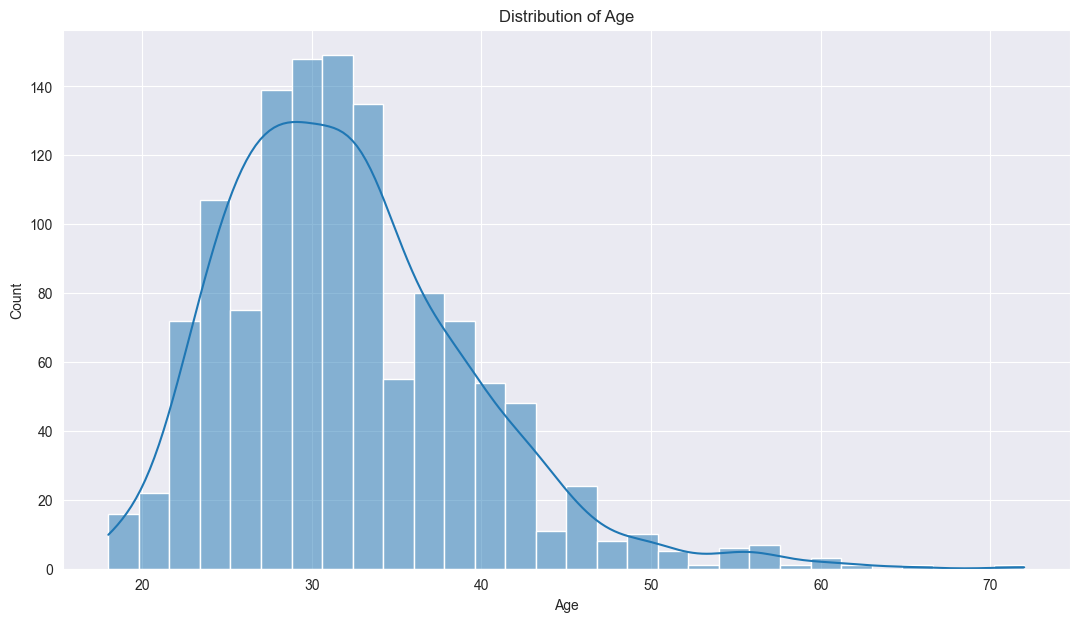

In [46]:
sns.set_style("darkgrid")
plt.figure(figsize=(13, 7))
# Filter ages between 15 and 80 for a cleaner plot
sns.histplot(data=df[(df['age'] >= 15) & (df['age'] <= 80)], x="age", bins=30, kde=True)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Count")
mlflow.log_figure(plt.gcf(), "artifacts/age_distribution.png")
plt.show()
plt.close()

## 4.2 Distribution of Catergorical Columns


In [48]:
len(cat_cols)

23

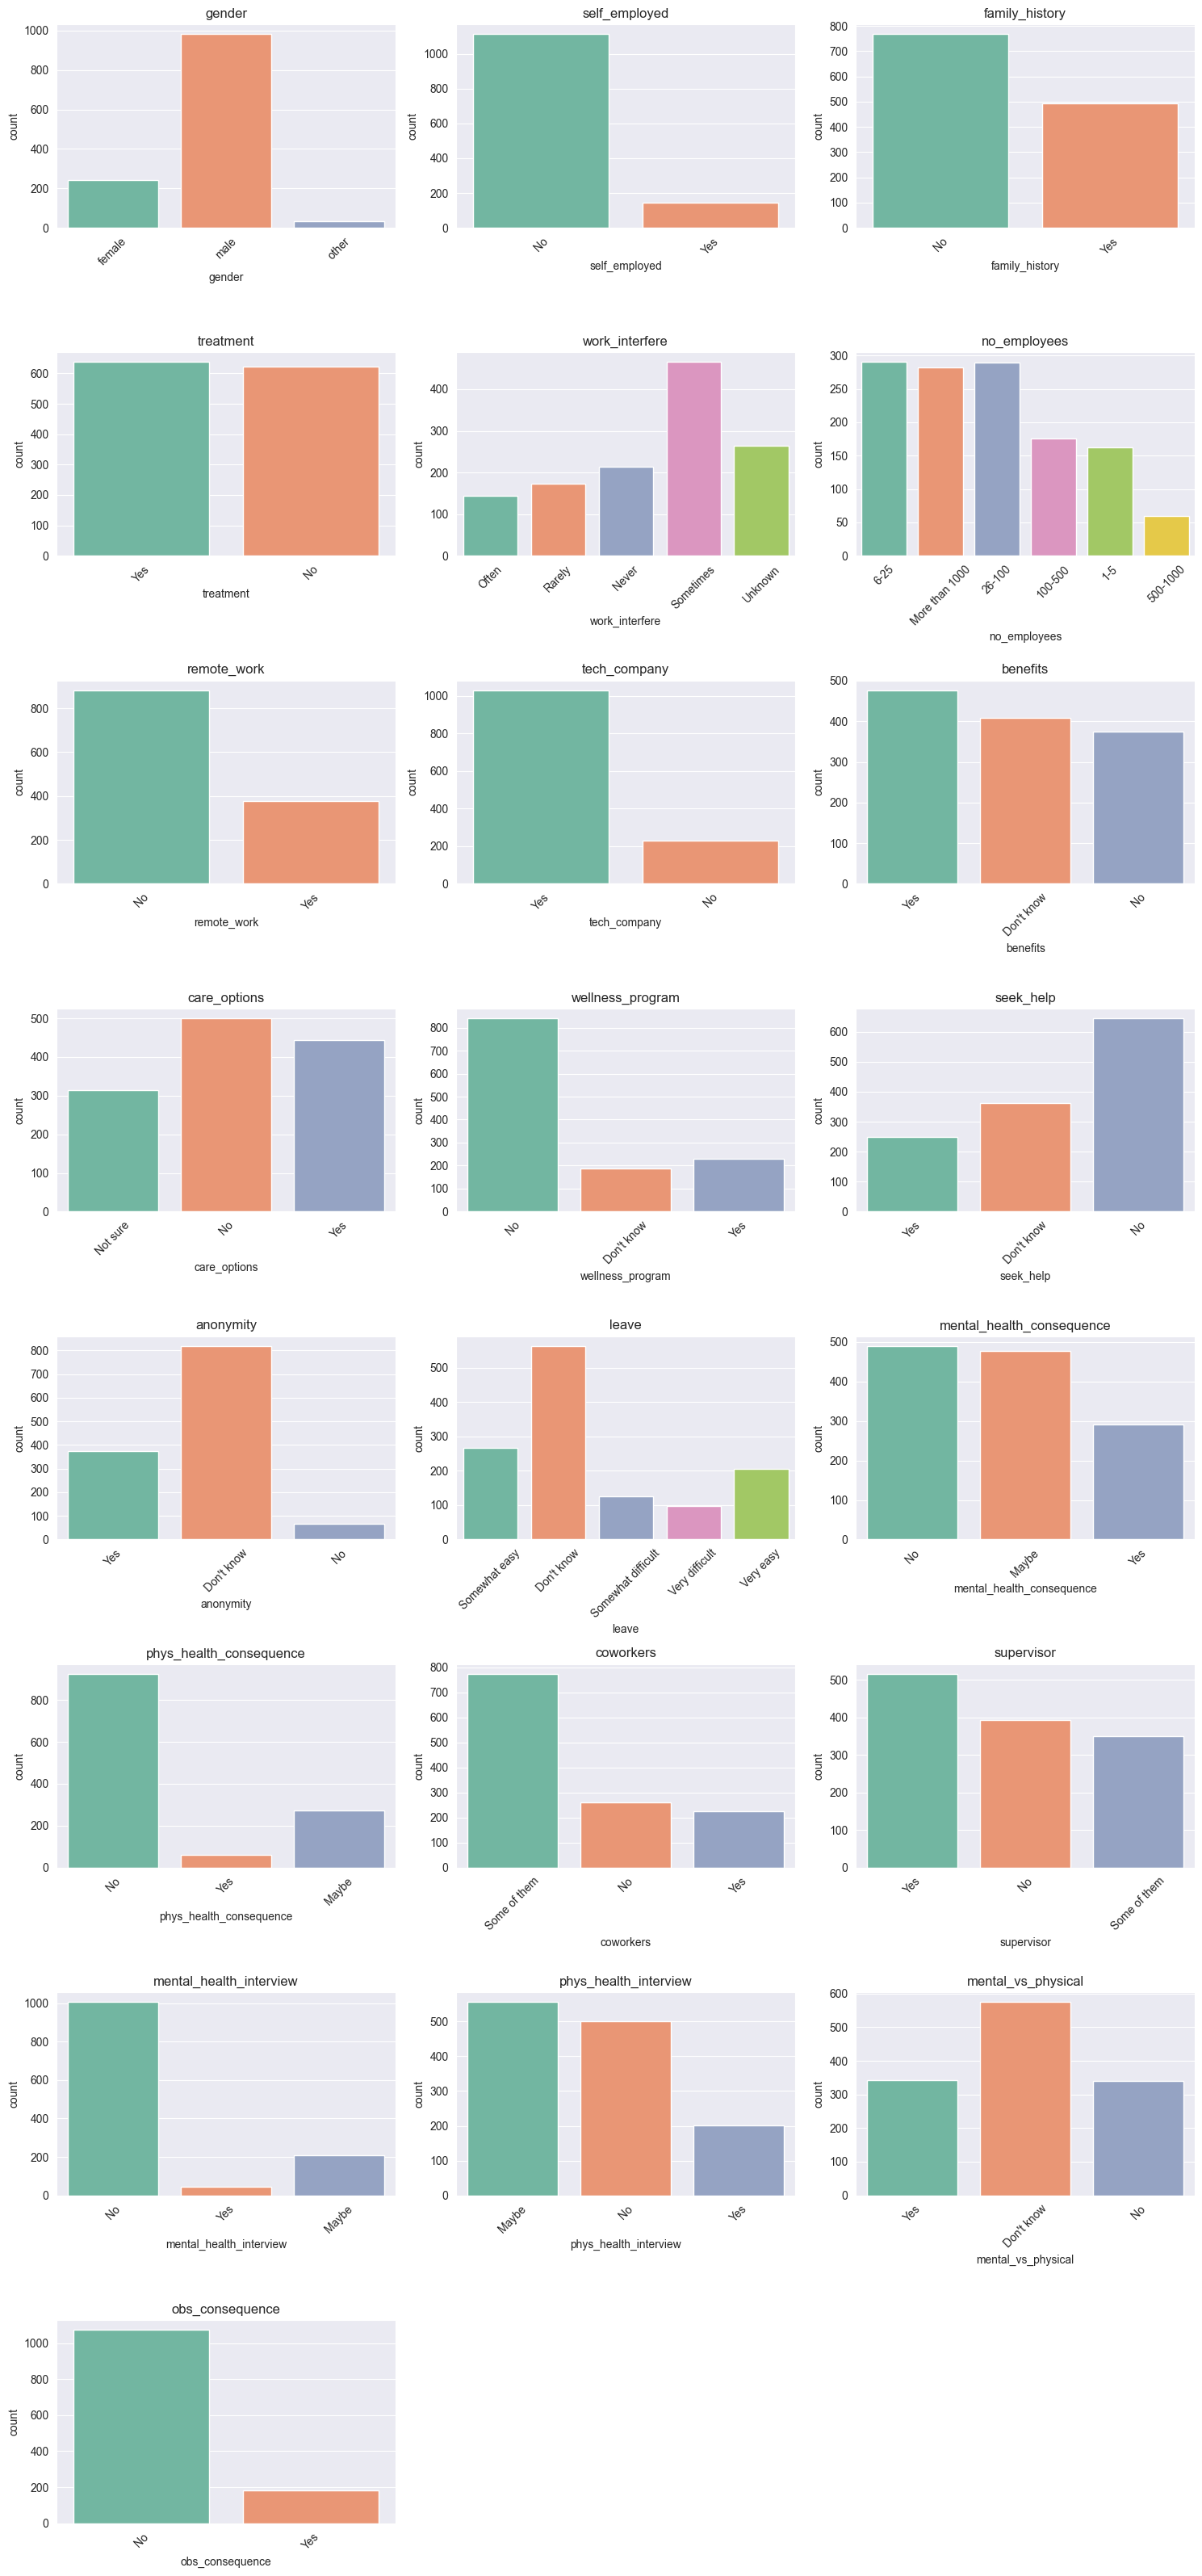

In [62]:
import math

cols = df.drop(['country','comments'], axis=1).select_dtypes(include='object').columns
n_cols = 3  # number of plots per row
n_rows = math.ceil(len(cols) / n_cols)

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 4*n_rows))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.countplot(data=df, x=col, ax=axes[i], palette='Set2')
    axes[i].set_title(f"{col}", fontsize=12)
    axes[i].tick_params(axis='x', rotation=45)

# hide unused axes
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.tight_layout()
mlflow.log_figure(plt.gcf(), "artifacts/Cat_col_dist.png")
plt.show()

# 5.0 Bivariate Analysis

### 5.1 Correlation Analysis

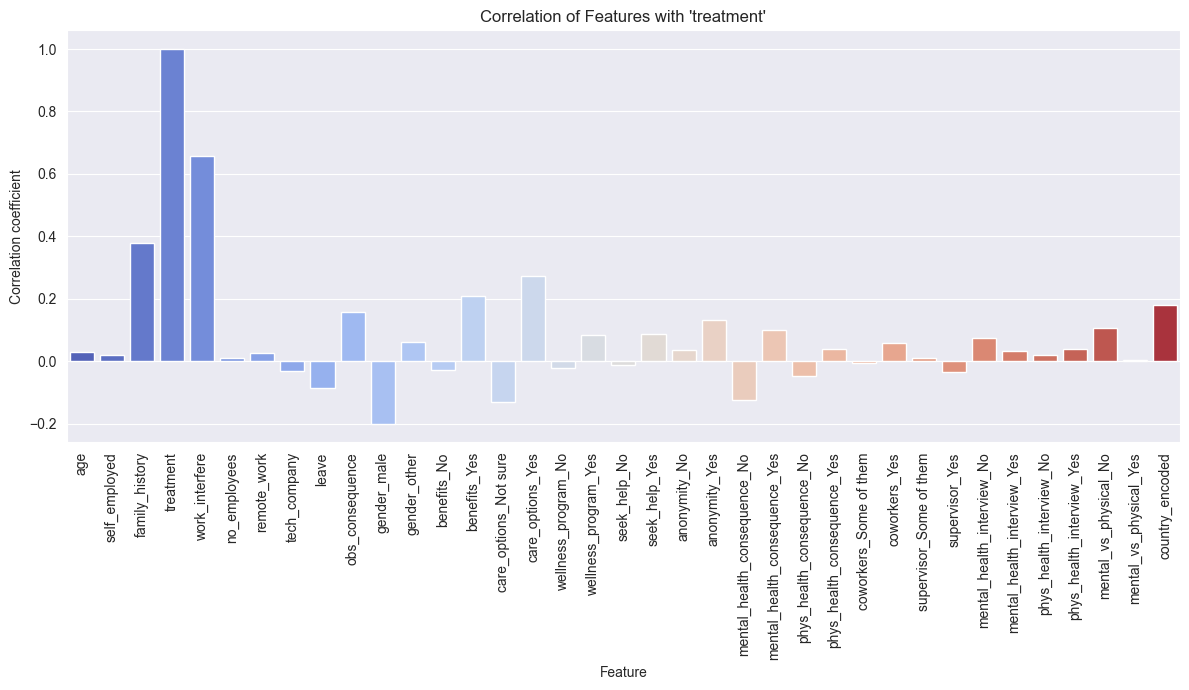

In [70]:
corr = pd.read_csv("../data/processed/mental_health_encoded.csv")
corr_ = corr.corr()['treatment']

plt.figure(figsize=(12, 7))
sns.barplot(x=corr_.index, y=corr_.values, palette="coolwarm")
plt.xticks(rotation=90)
plt.title("Correlation of Features with 'treatment'")
plt.ylabel("Correlation coefficient")
plt.xlabel("Feature")
plt.tight_layout()
mlflow.log_figure(plt.gcf(), "artifacts/corr_map.png")
plt.show()

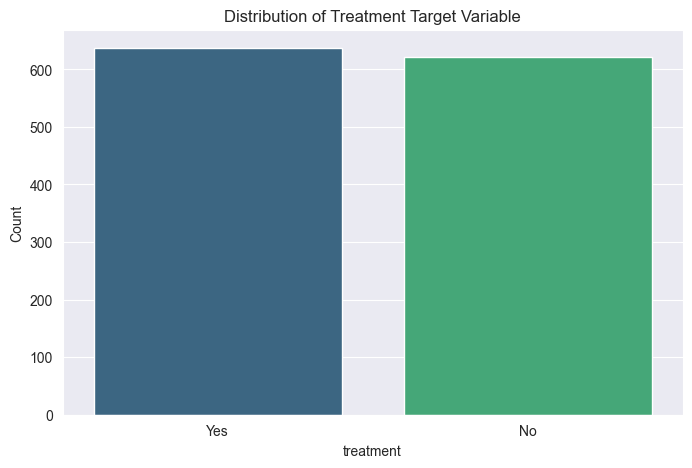

In [72]:
# Target distribution
plt.figure(figsize=(8, 5))
treatment_counts = df['treatment'].value_counts()
sns.countplot(data=df, x='treatment', palette='viridis')
plt.title('Distribution of Treatment Target Variable')
plt.ylabel('Count')

# Log class imbalance metric
class_imbalance = treatment_counts.min() / treatment_counts.max()
mlflow.log_metric("class_imbalance_ratio", class_imbalance)

mlflow.log_figure(plt.gcf(), "artifacts/target_distribution.png")
plt.show()

### 5.2 Key Feature Analysis by Treatment Status

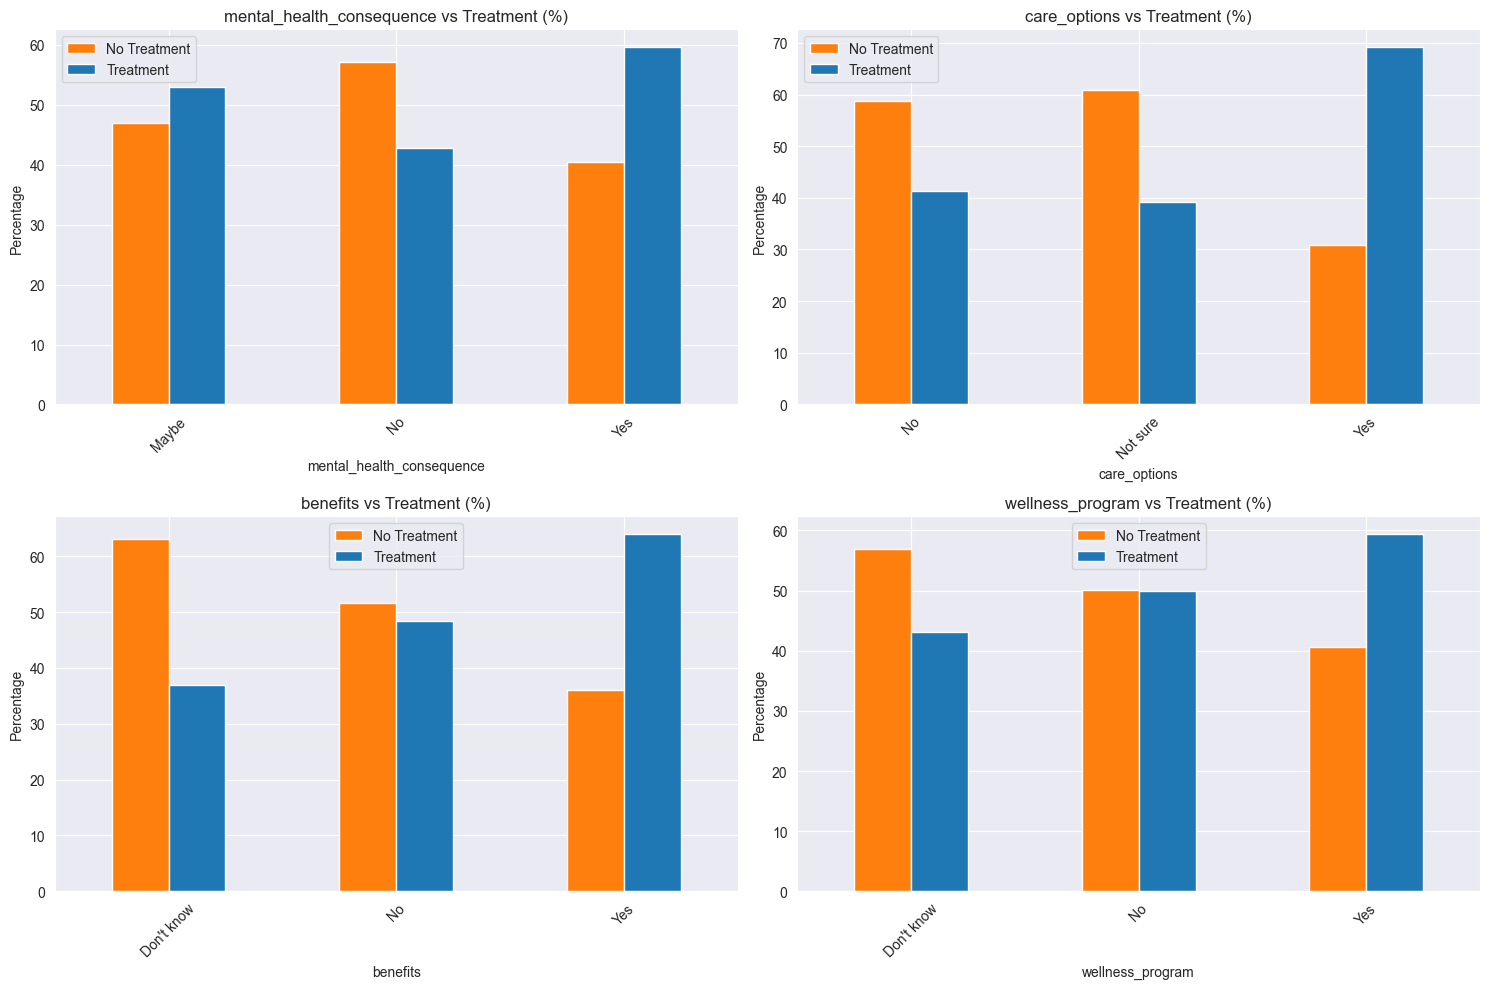

In [73]:
# High-impact features analysis
key_features = ['mental_health_consequence', 'care_options', 'benefits', 'wellness_program']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(key_features):
    crosstab = pd.crosstab(df[feature], df['treatment'], normalize='index') * 100
    crosstab.plot(kind='bar', ax=axes[i], color=['#ff7f0e', '#1f77b4'])
    axes[i].set_title(f'{feature} vs Treatment (%)')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Percentage')
    axes[i].legend(['No Treatment', 'Treatment'])
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
mlflow.log_figure(plt.gcf(), "artifacts/key_features_treatment.png")
plt.show()

### 5.3 Age Distribution by Treatment Status

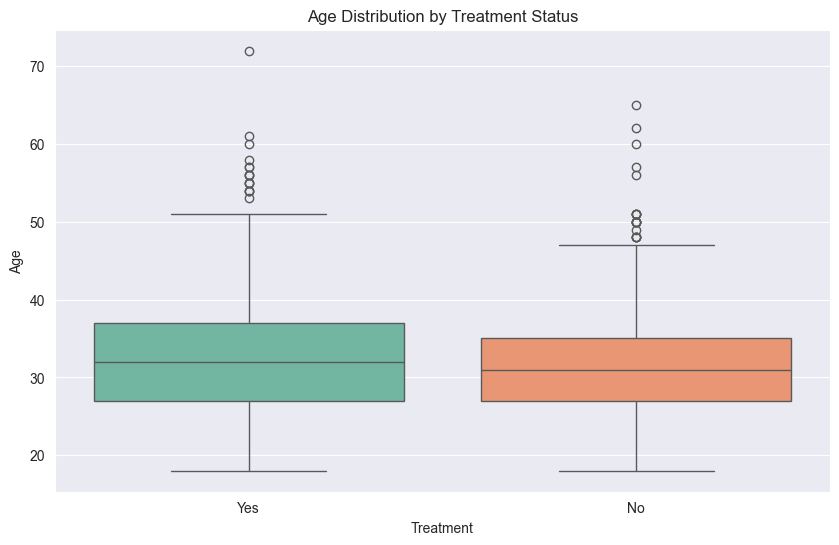

In [74]:
# Age distribution by treatment
plt.figure(figsize=(10, 6))
age_filtered = df[(df['age'] >= 15) & (df['age'] <= 80)]

sns.boxplot(data=age_filtered, x='treatment', y='age', palette='Set2')
plt.title('Age Distribution by Treatment Status')
plt.xlabel('Treatment')
plt.ylabel('Age')

# Log age statistics by treatment
age_stats = age_filtered.groupby('treatment')['age'].agg(['mean', 'median', 'std'])
for treatment in age_stats.index:
    mlflow.log_metric(f"age_mean_treatment_{treatment}", age_stats.loc[treatment, 'mean'])
    mlflow.log_metric(f"age_median_treatment_{treatment}", age_stats.loc[treatment, 'median'])

mlflow.log_figure(plt.gcf(), "artifacts/age_by_treatment.png")
plt.show()

# 6.0 Feature Importance Analysis

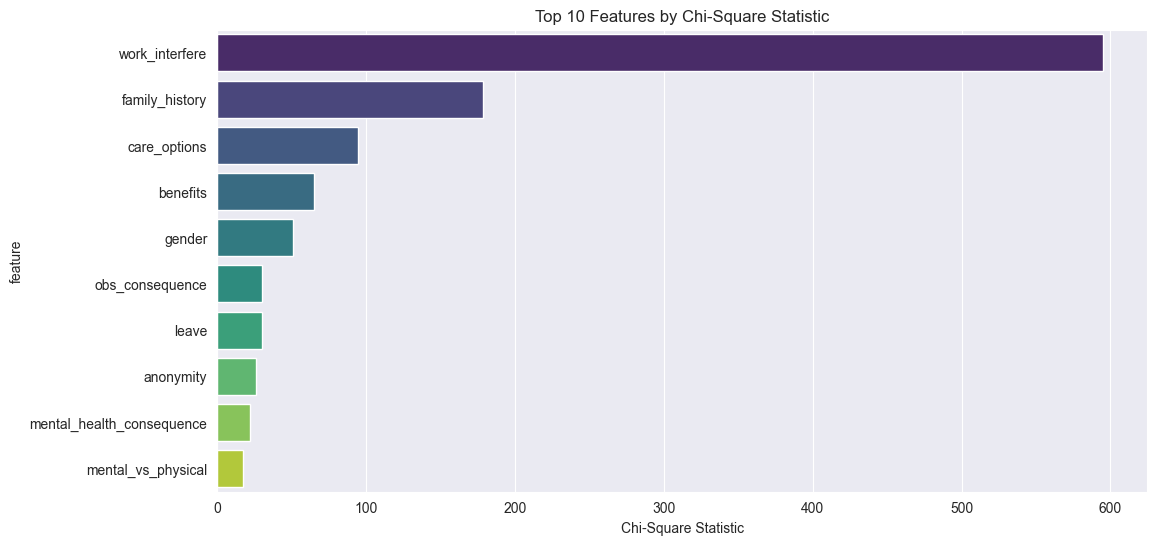

In [75]:
# Chi-square test for categorical features
from scipy.stats import chi2_contingency

categorical_features = df.select_dtypes(include=['object']).columns.drop(['country', 'comments'])
chi2_results = []

for feature in categorical_features:
    if feature != 'treatment':
        contingency_table = pd.crosstab(df[feature], df['treatment'])
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        chi2_results.append({'feature': feature, 'chi2_stat': chi2, 'p_value': p_value})

chi2_df = pd.DataFrame(chi2_results).sort_values('chi2_stat', ascending=False).head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=chi2_df, x='chi2_stat', y='feature', palette='viridis')
plt.title('Top 10 Features by Chi-Square Statistic')
plt.xlabel('Chi-Square Statistic')

# Log top features
for idx, row in chi2_df.iterrows():
    mlflow.log_metric(f"chi2_{row['feature']}", row['chi2_stat'])

mlflow.log_figure(plt.gcf(), "artifacts/feature_importance_chi2.png")
plt.show()

# 7.0 Company Size and Remote Work Analysis

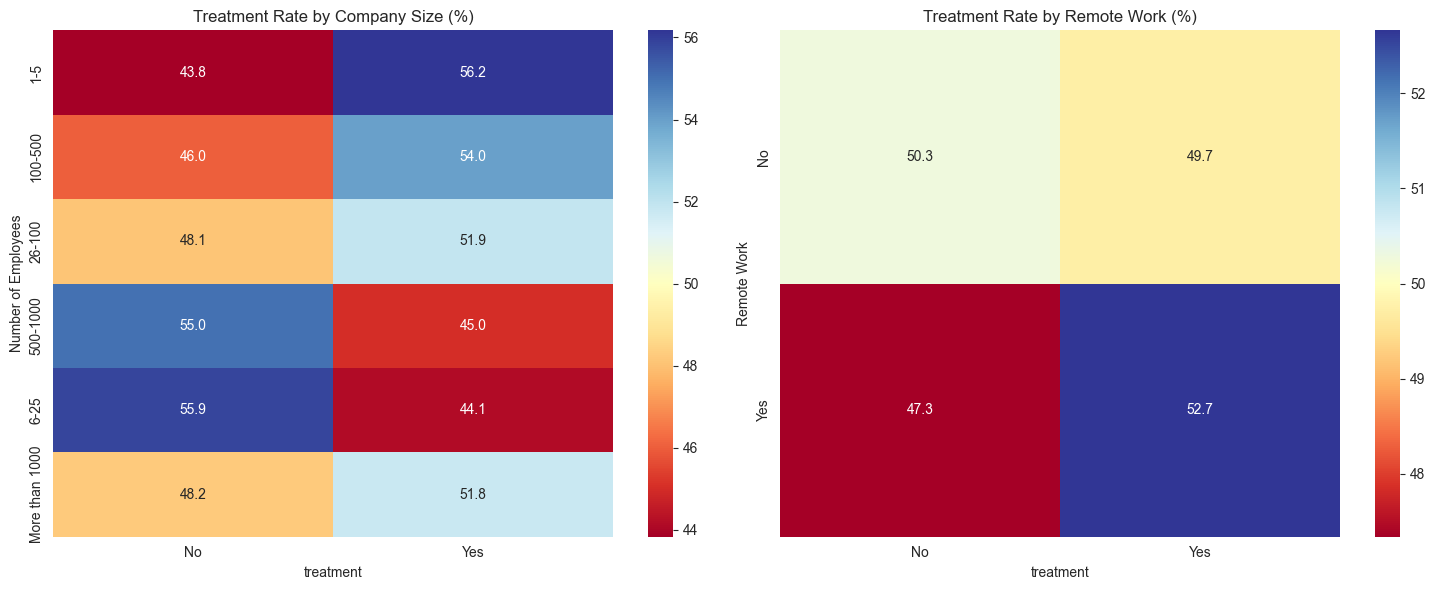

In [76]:
# Company size vs Remote work heatmap
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Company size vs treatment
size_treatment = pd.crosstab(df['no_employees'], df['treatment'], normalize='index') * 100
sns.heatmap(size_treatment, annot=True, fmt='.1f', cmap='RdYlBu', ax=axes[0])
axes[0].set_title('Treatment Rate by Company Size (%)')
axes[0].set_ylabel('Number of Employees')

# Remote work vs treatment
remote_treatment = pd.crosstab(df['remote_work'], df['treatment'], normalize='index') * 100
sns.heatmap(remote_treatment, annot=True, fmt='.1f', cmap='RdYlBu', ax=axes[1])
axes[1].set_title('Treatment Rate by Remote Work (%)')
axes[1].set_ylabel('Remote Work')

plt.tight_layout()
mlflow.log_figure(plt.gcf(), "artifacts/company_remote_analysis.png")
plt.show()

# 8.0 EDA Summary & Key Insights

In [77]:
# Log final EDA metrics
treatment_rate = df['treatment'].value_counts(normalize=True)['Yes'] * 100
top_features = chi2_df.head(5)['feature'].tolist()

mlflow.log_metric("overall_treatment_rate", treatment_rate)
mlflow.log_param("top_5_features", top_features)

print("EDA Summary:")
print(f"• Overall treatment rate: {treatment_rate:.1f}%")
print(f"• Class imbalance ratio: {class_imbalance:.3f}")
print(f"• Top predictive features: {', '.join(top_features[:3])}")
print(f"• Age range (filtered): 15-80 years")
print(f"• Missing data: {missing_pct:.2f}%")

# End MLflow run
mlflow.end_run()
print(f"\nMLflow run completed. Artifacts logged: {len(top_features) + 6} charts")

EDA Summary:
• Overall treatment rate: 50.6%
• Class imbalance ratio: 0.976
• Top predictive features: work_interfere, family_history, care_options
• Age range (filtered): 15-80 years
• Missing data: 0.00%
🏃 View run EDA at: https://dagshub.com/utkarsh820/mentopred.mlflow/#/experiments/0/runs/efba68f3c640488084927fa95a68baee
🧪 View experiment at: https://dagshub.com/utkarsh820/mentopred.mlflow/#/experiments/0
🏃 View run EDA at: https://dagshub.com/utkarsh820/mentopred.mlflow/#/experiments/0/runs/efba68f3c640488084927fa95a68baee
🧪 View experiment at: https://dagshub.com/utkarsh820/mentopred.mlflow/#/experiments/0

MLflow run completed. Artifacts logged: 11 charts

MLflow run completed. Artifacts logged: 11 charts


# 9.0 EDA Report & Future Actions

## Key Findings Summary

### Dataset Overview

* **Size:** 1,259 records × 26 features
* **Missing Data:** 0.00% (clean dataset)
* **Target Balance:** 50.6% Yes vs 49.4% No
* **Class Imbalance Ratio:** 0.976 (well balanced)

### Most Predictive Features (Chi-Square Analysis)

1. **work_interfere** – How mental health affects work
2. **family_history** – Presence of mental health issues in family
3. **care_options** – Awareness of available care options
4. **mental_health_consequence** – Perceived consequences of discussing mental health
5. **benefits** – Availability of mental health benefits

### Demographics Insights

* **Age:** Mostly 22–50 years, typical tech workforce
* **Age vs Treatment:** No significant age bias
* **Gender:** Balanced representation across categories

### Workplace Patterns

* **Company Size:** Mid-size companies (26–100 employees) show higher treatment rates
* **Remote Work:** Slightly higher likelihood of seeking treatment
* **Benefits:** Strong positive correlation with treatment

### Mental Health Culture

* **Consequence Fear:** Major barrier to seeking help
* **Family History:** Key predictor of treatment behavior
* **Work Interference:** Strongly linked with treatment decisions